Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none
Class distribution: 357 benign, 212 malignant

### Import Libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [33]:
df = pd.read_csv("data.csv")

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Wrangling

In [35]:
df.info() #here we can see the dtypes which show if there are categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observations:
* Only the 'diagnosis' column, which we want to predict is an object datatype.
  * This means we'll have to perfom an encoding technique.
* ID is the only column of int type. 
  * We will probably drop it anyway, as it doesn't gives us any useful information.
* There are a total of 31 columns which are of float datatype.

In [36]:
df.shape

(569, 33)

In [37]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Missing Values

In [38]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [39]:
df = df.dropna(axis=1, how='all') #drop columns where all rows are NaN

In [40]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Now, there are no missing values.
If we had a few NaN or NULL values, we could apply the following code to use a mean interpolation:

In [41]:
#df.fillna(df.mean())

In [42]:
#id column is irrelevant so it will be removed
df = df.drop(["id"], axis=1)

#### Categorical Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

diagnosis_le = LabelEncoder()
df["diagnosis"] = diagnosis_le.fit_transform(df["diagnosis"])

In [44]:
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

* M -> 1
* B -> 0

### Visualizing the Data

In [45]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

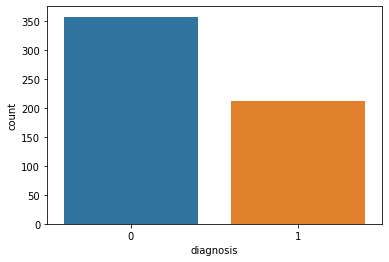

In [46]:
sns.countplot(x = df['diagnosis'])

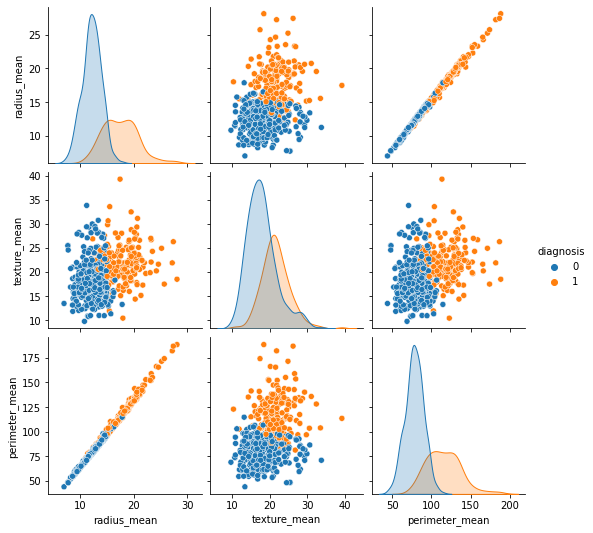

In [47]:
sns.pairplot(df.iloc[:, 0:4], hue='diagnosis')

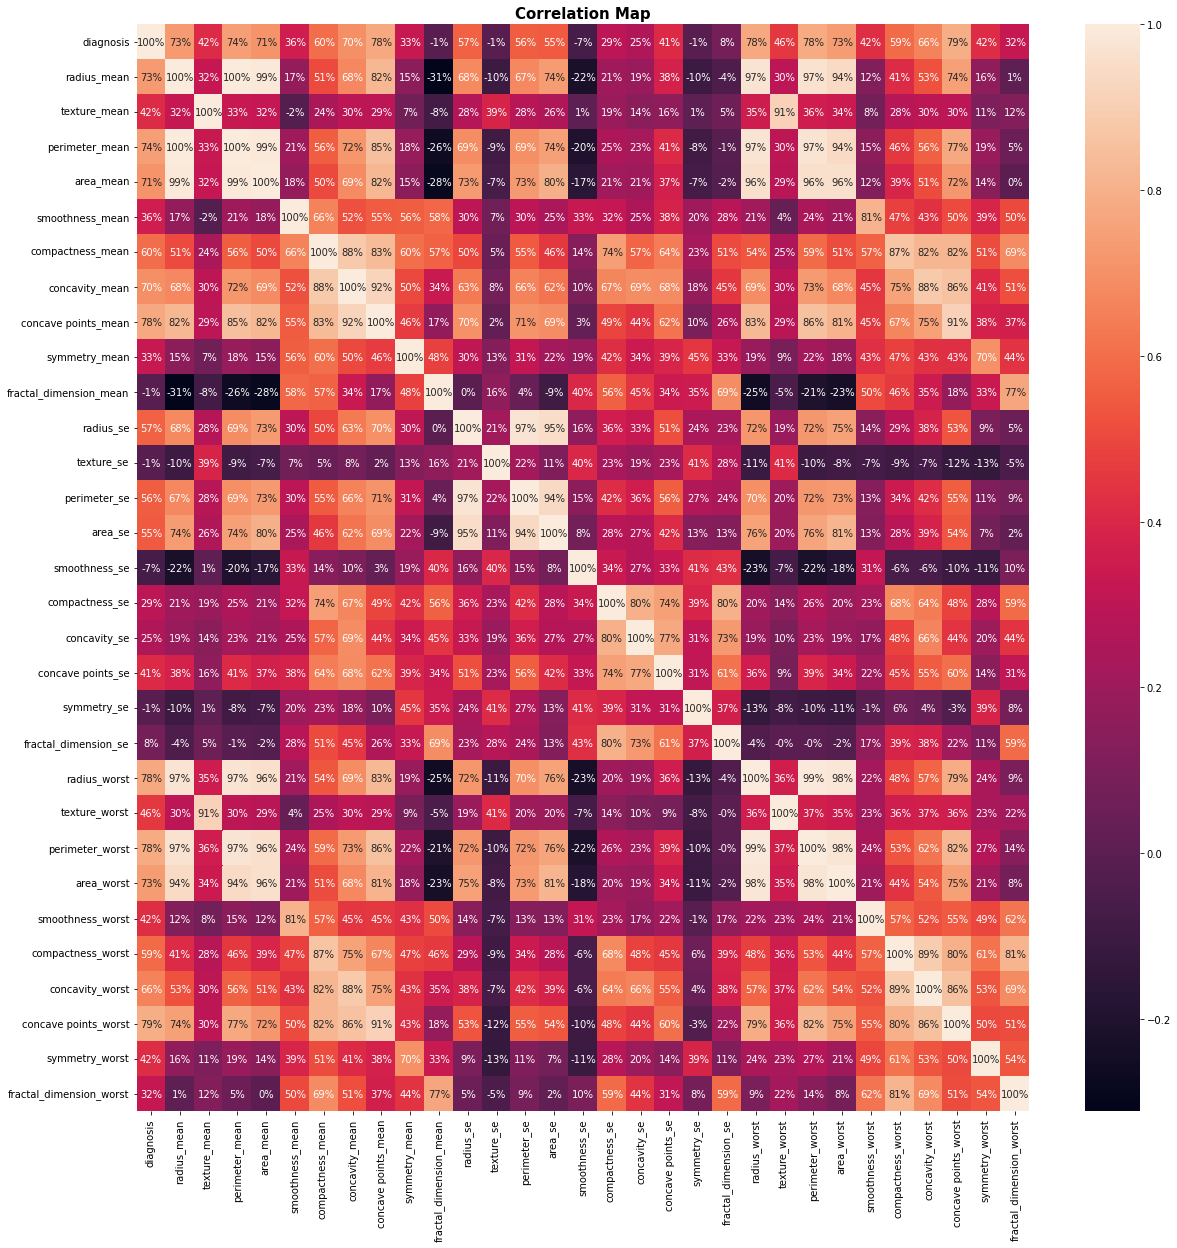

In [48]:
#create a heatmap to observe the correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt = ".0%") #annot to show the numbers on top of each square, fmt to change format to percentage
plt.title("Correlation Map", fontweight = "bold", fontsize=15)
plt.show()

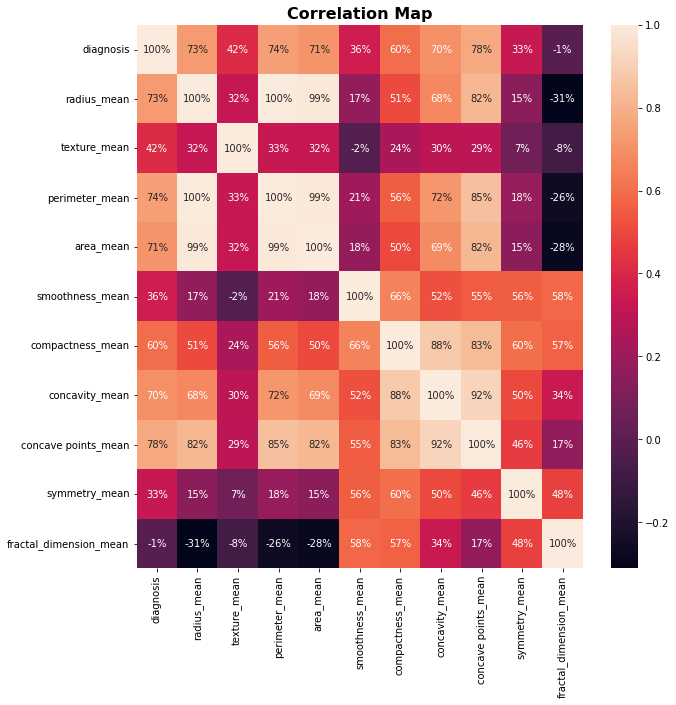

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:, 0:11].corr(), annot=True, fmt = ".0%")
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

Let's observe which features are correlated with 'diagnosis' >= 60%

In [50]:
corr = df.corr()
corr_columns = corr.loc[abs(corr['diagnosis']) >= 0.6, df.columns == 'diagnosis']
corr_columns

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
concavity_mean,0.696360
concave points_mean,0.776614
radius_worst,0.776454
perimeter_worst,0.782914
area_worst,0.733825
concavity_worst,0.659610


With this information we can decide to only use these features for the prediction, or use all the columns.

In [51]:
corr_columns_lst = corr_columns.index.tolist()
corr_columns_lst

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

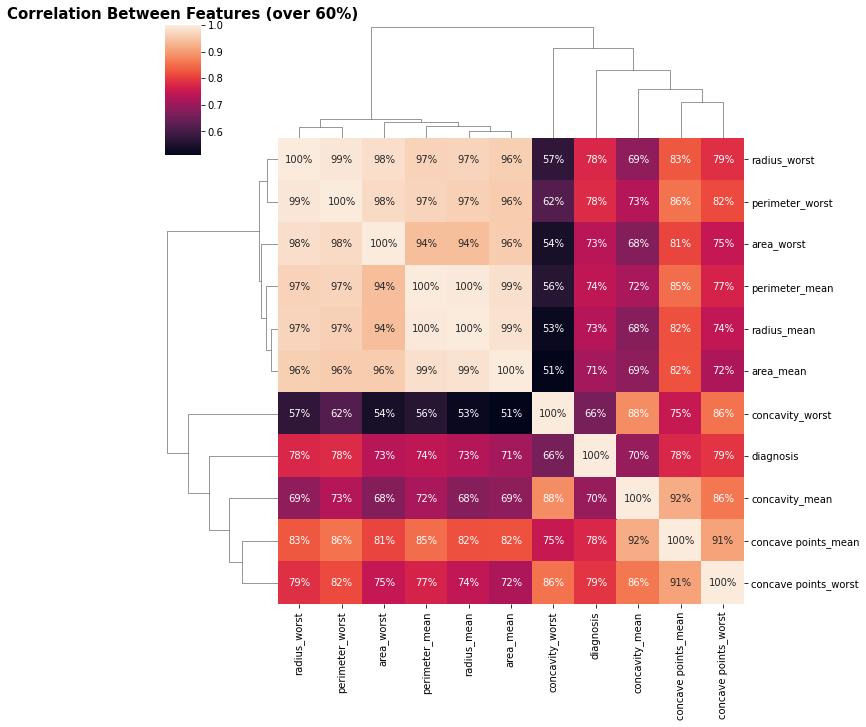

In [52]:
sns.clustermap(df[corr_columns_lst].corr(), annot = True, fmt = ".0%")
plt.title("Correlation Between Features (over 60%)", fontweight = "bold", fontsize=15)
plt.show()

The Clustermap matches features and groups of features together following the Hierarchical Clustering algorithm. Thus, features that are closer between each other will be grouped together.

### Feature Selection & Train-Test split

In [53]:
X = df.loc[:, df.columns != 'diagnosis']
y = df["diagnosis"]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Model Training
I'll try different algorithms using the following function that I've implemented, which I usually use in my experiments. 

In [56]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svl_model = LinearSVC(dual=False)
svc_model = SVC(kernel="rbf", C=0.025, probability=True)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
gbc_model = GradientBoostingClassifier()
gnb_model = GaussianNB()
xgb_model = XGBClassifier()

# Define the models evaluation function
def models_evaluation(X, y, folds, plot=False):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds

    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svl = cross_validate(svl_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    ada = cross_validate(ada_model, X, y, cv=folds, scoring=scoring)
    gbc = cross_validate(gbc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'SVM Linear Classifier':[svl['test_accuracy'].mean(),
                                                               svl['test_precision'].mean(),
                                                               svl['test_recall'].mean(),
                                                               svl['test_f1_score'].mean()],
                                        
                                      'SVM Classifier (rbf)':[svc['test_accuracy'].mean(),
                                                              svc['test_precision'].mean(),
                                                              svc['test_recall'].mean(),
                                                              svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                        
                                      'AdaBoost':[ada['test_accuracy'].mean(),
                                                  ada['test_precision'].mean(),
                                                  ada['test_recall'].mean(),
                                                  ada['test_f1_score'].mean()],
                                        
                                      'Gradient Boosting':[gbc['test_accuracy'].mean(),
                                                           gbc['test_precision'].mean(),
                                                           gbc['test_recall'].mean(),
                                                           gbc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       
                                      'XGBoost':[xgb['test_accuracy'].mean(),
                                                 xgb['test_precision'].mean(),
                                                 xgb['test_recall'].mean(),
                                                 xgb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

    if(plot):
      plt.figure(figsize = (10,5))
      sns.barplot(x=models_scores_table.loc["Accuracy", models_scores_table.columns != "Best Score"].values, 
                  y=models_scores_table.loc["Accuracy", models_scores_table.columns != "Best Score"].index)
      plt.title("Model Accuracies", fontsize=15, fontweight="bold")
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

,Logistic Regression,SVM Linear Classifier,SVM Classifier (rbf),Decision Tree,Random Forest,AdaBoost,Gradient Boosting,Gaussian Naive Bayes,XGBoost,Best Score
Accuracy,0.964842,0.954778,0.891994,0.914620,0.944778,0.949747,0.949715,0.932152,0.952247,Logistic Regression
Precision,0.981427,0.955191,1.000000,0.883197,0.937519,0.937770,0.937260,0.929590,0.953950,SVM Classifier (rbf)
Recall,0.930242,0.930040,0.726815,0.904839,0.923992,0.936694,0.936290,0.898790,0.923589,AdaBoost
F1 Score,0.954057,0.941790,0.838751,0.892628,0.929688,0.936375,0.936025,0.912655,0.938217,Logistic Regression


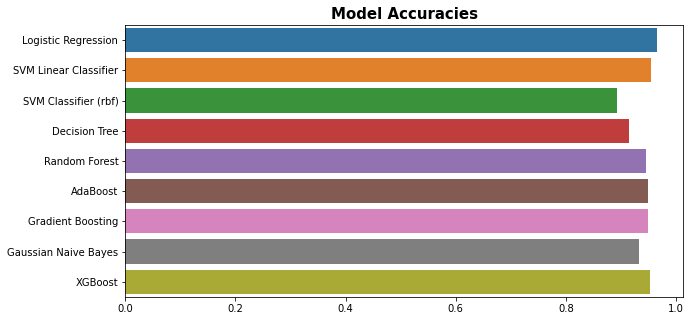

In [57]:
# Run models_evaluation function
models_evaluation(X_train, y_train, 5, plot=True) #we'll use k=5 folds for cross validation

We can see that Logistic Regression gives us the best accuracy, and also the best F1 score. Thus, our model is neither overfitted nor underfitted.

### Train with best model

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [60]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [61]:
#!pip install session_info
#import session_info
#session_info.show()